# **Lending Club Case Study**

## Business Understanding 

##### The Lending club case study data contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

##### In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

#### Group Facilitator : 
                    Name: Subrata Das 
                    Email ID: subrata.pucsd@gmail.com 
                    Phone No:918861506628          

#### Team Member Detail: 
                    Name: Suhas Naik 
                    Email ID: suhasnaikk@gmail.com 
                    Phone no: 918722476171 

   ----------------------------------------------------------------------------------------------------------------------------------------

### 1. Importing python libraries and reading dataset

* Load necessary libraries like pandas, NumPy, and matplotlib for data manipulation and visualization

In [8]:
#Importing Libraries

# Numerical and Data Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
#Loading the data
df = pd.read_csv('/Users/Suvz/Downloads/Lending case study/loan.csv', sep=',')

   ----------------------------------------------------------------------------------------------------------------------------------------

### 2. Understanding the dataframe

* View Data: Use methods like head() and tail() to see the first and last few rows.
* Summary Statistics: Use describe() to get an overview of numerical columns.
* Check Data Types: Use info() to see the data types and non-null counts.

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
print(df.shape)
print(df.describe())

(39717, 111)
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


   ----------------------------------------------------------------------------------------------------------------------------------------

### 3. Data Cleaning
##### Removing data based on the following factors
##### 1. High number of Null/NAN Values
##### 2. Single unique values
##### 3. High number of unique values
##### 4. Non numerical data (Member ID, Data Source etc)
##### 5. Data that is only availble after the loan has been given 
##### 6. Handle Missing Values
##### 7. Remove Duplicates
##### 8. Correct Data Types

In [17]:
#Checking the columns with all rows having a single value
df.nunique()==1

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                      True
tot_hi_cred_lim               False
total_bal_ex_mort             False
total_bc_limit                False
total_il_high_credit_limit    False
Length: 111, dtype: bool

In [18]:
#Checking the columns with all unique values
df.nunique()==df.shape[0]

id                             True
member_id                      True
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim               False
total_bal_ex_mort             False
total_bc_limit                False
total_il_high_credit_limit    False
Length: 111, dtype: bool

In [19]:
#Checking the column with a number of NaN values
df.isna().sum()==df.shape[0]

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool

In [20]:
#Dropping all the columns of
columns_to_drop=df.columns[
    (df.nunique() == 1) |              # Columns with a single unique value
    (df.nunique() == df.shape[0]) |    # Columns where all values are unique (like ID columns)
    (df.isna().sum() == df.shape[0])]  # Columns where all values are missing

# Drop the irrelevant columns 'columns_to_drop'
#I will keep primary key 'member_id' for the reference
columns_to_drop = [col for col in columns_to_drop if col != 'member_id']
df.drop(columns=columns_to_drop,inplace=True)
df.shape

(39717, 46)

In [21]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


In [22]:
#Checking the percentage of null values
null_percentage = df.isnull().mean() * 100

In [23]:
#Checking how many columns have more than 30% of nulls
null_columns = null_columns = null_percentage[null_percentage > 30].index

In [24]:
df.shape

(39717, 46)

#### Dropping NULL columns having more than 30%

In [26]:
# Dropping NULL columns having more than 30%
df.drop(columns=null_columns, inplace=True)
print(df.shape)
print(df.columns)

(39717, 42)
Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')


In [27]:
#Checking duplicate records
df[df.duplicated()].shape[0]

0

   ----------------------------------------------------------------------------------------------------------------------------------------

### 4. Data Manipulations and wrangling

* Filtering: Select specific rows or columns based on conditions.
* Aggregating: Summarize data using groupby operations (e.g., calculating averages).
* Feature Engineering: Create new variables or modify existing ones for analysis.

##### I see special characters in the below columns and will clean those
##### We can use the mode for emp_length (10+ years), revol_util (0%), and pub_rec_bankruptcies (0.0) 
##### in each case, the mode appears significantly more frequently than the next most common value, making it the most representative and reliable estimate for imputation. Helps in retaining current distribution of data.

##### Analyze emp_length, revol_util and pub_rec_bankruptcies to determine the best value for imputing nulls

In [30]:
# We can use the mode for emp_length (10+ years), revol_util (0%), and pub_rec_bankruptcies (0.0) 
# in each case, the mode appears significantly more frequently than the next most common value, making it the most 
#representative and reliable estimate for imputation. Helps in retaining current distribution of data.

# Analyze emp_length, revol_util and pub_rec_bankruptcies to determine the best value for imputing nulls
print(df.emp_length.value_counts())
print(df.revol_util.value_counts())
print(df.pub_rec_bankruptcies.value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
0%        977
0.20%      63
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64
0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64


In [31]:
# Fill the null values with mode values
df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)
df.revol_util.fillna(df.revol_util.mode()[0], inplace = True)
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [32]:
# Remove the '%' sign from values in the int_rate column and convert them to float

df.int_rate = df.int_rate.apply(lambda x: str(x).replace("%", "")).astype('float64')

In [33]:
# Convert emp_length values to integers: '<1 year' to 0, '10+ years' to 10, and others to their leading digit

df.emp_length = df.emp_length.apply(lambda x: 0 if '<' in str(x) else (10 if '10' in str(x) else str(x)[0])).astype('int')

In [34]:
# Remove the '%' sign from values in the revol_util column and convert them to float

df.revol_util = df.revol_util.apply(lambda x: str(x).replace("%", "")).astype('float64')

In [35]:
# Convert the issue_d (issue date) column to datetime format with the specified format '%b-%y' (MMM-YY)

df.issue_d = pd.to_datetime(df.issue_d, format='%b-%y')

In [36]:
# Convert the earliest_cr_line column to datetime format with the specified format '%b-%y'

import datetime
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line, format='%b-%y')
df.earliest_cr_line = df.earliest_cr_line.mask(df.earliest_cr_line.dt.year > datetime.datetime.now().year,df.earliest_cr_line - pd.DateOffset(years=100))

In [37]:
#Converting verification_status as there are two verfied buckets

df.verification_status=df.verification_status.apply(lambda x: "Verified" if x=="Source Verified" else x)

In [38]:
#Find categorical columns and remove any leading/trailing spaces (like ' 36 months' to '36 months' in term column)

catcols=df.select_dtypes(include=['object']).columns
df[catcols] =df[catcols].apply(lambda x: x.str.strip())

In [39]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


---------------------------------------------------------------------------------------------------------------------------------------------

### 5. Univariate Analysis

* Representing and interpreting a single variable at a time

In [42]:
#Identify numerical data columns

numcols=df.select_dtypes(include=['int32','int64','float64']).columns
numcols

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

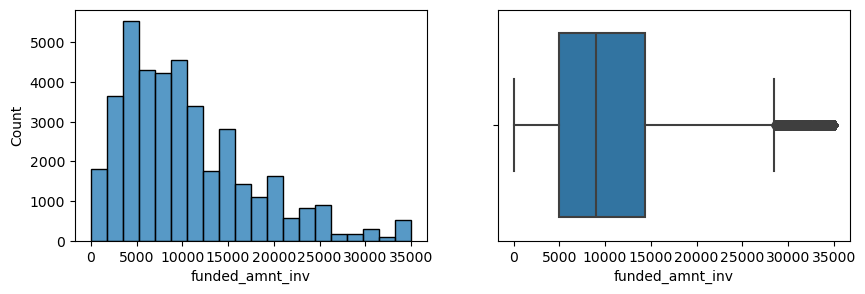

In [43]:
#Histogram and box plots on bank investment
fig, axs = plt.subplots(ncols=2, figsize=(10,3))

sns.histplot(df, x="funded_amnt_inv", bins=20, kde=False, ax=axs[0])
sns.boxplot(df, x="funded_amnt_inv", ax=axs[1])

plt.show()

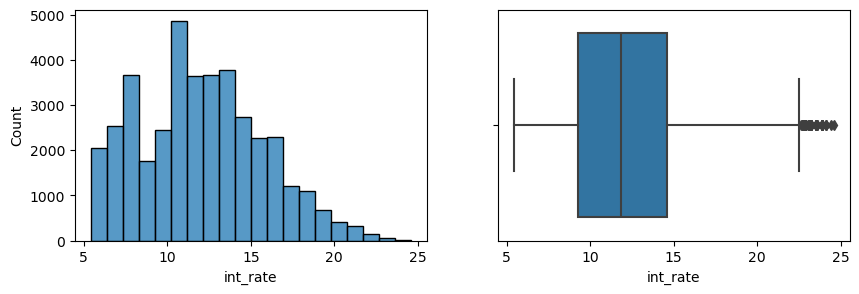

In [44]:
fig, axs = plt.subplots(ncols=2, figsize=(10,3))
sns.histplot(df, x="int_rate", bins=20,kde=False, ax=axs[0])
sns.boxplot(df, x="int_rate", ax=axs[1])
plt.show()

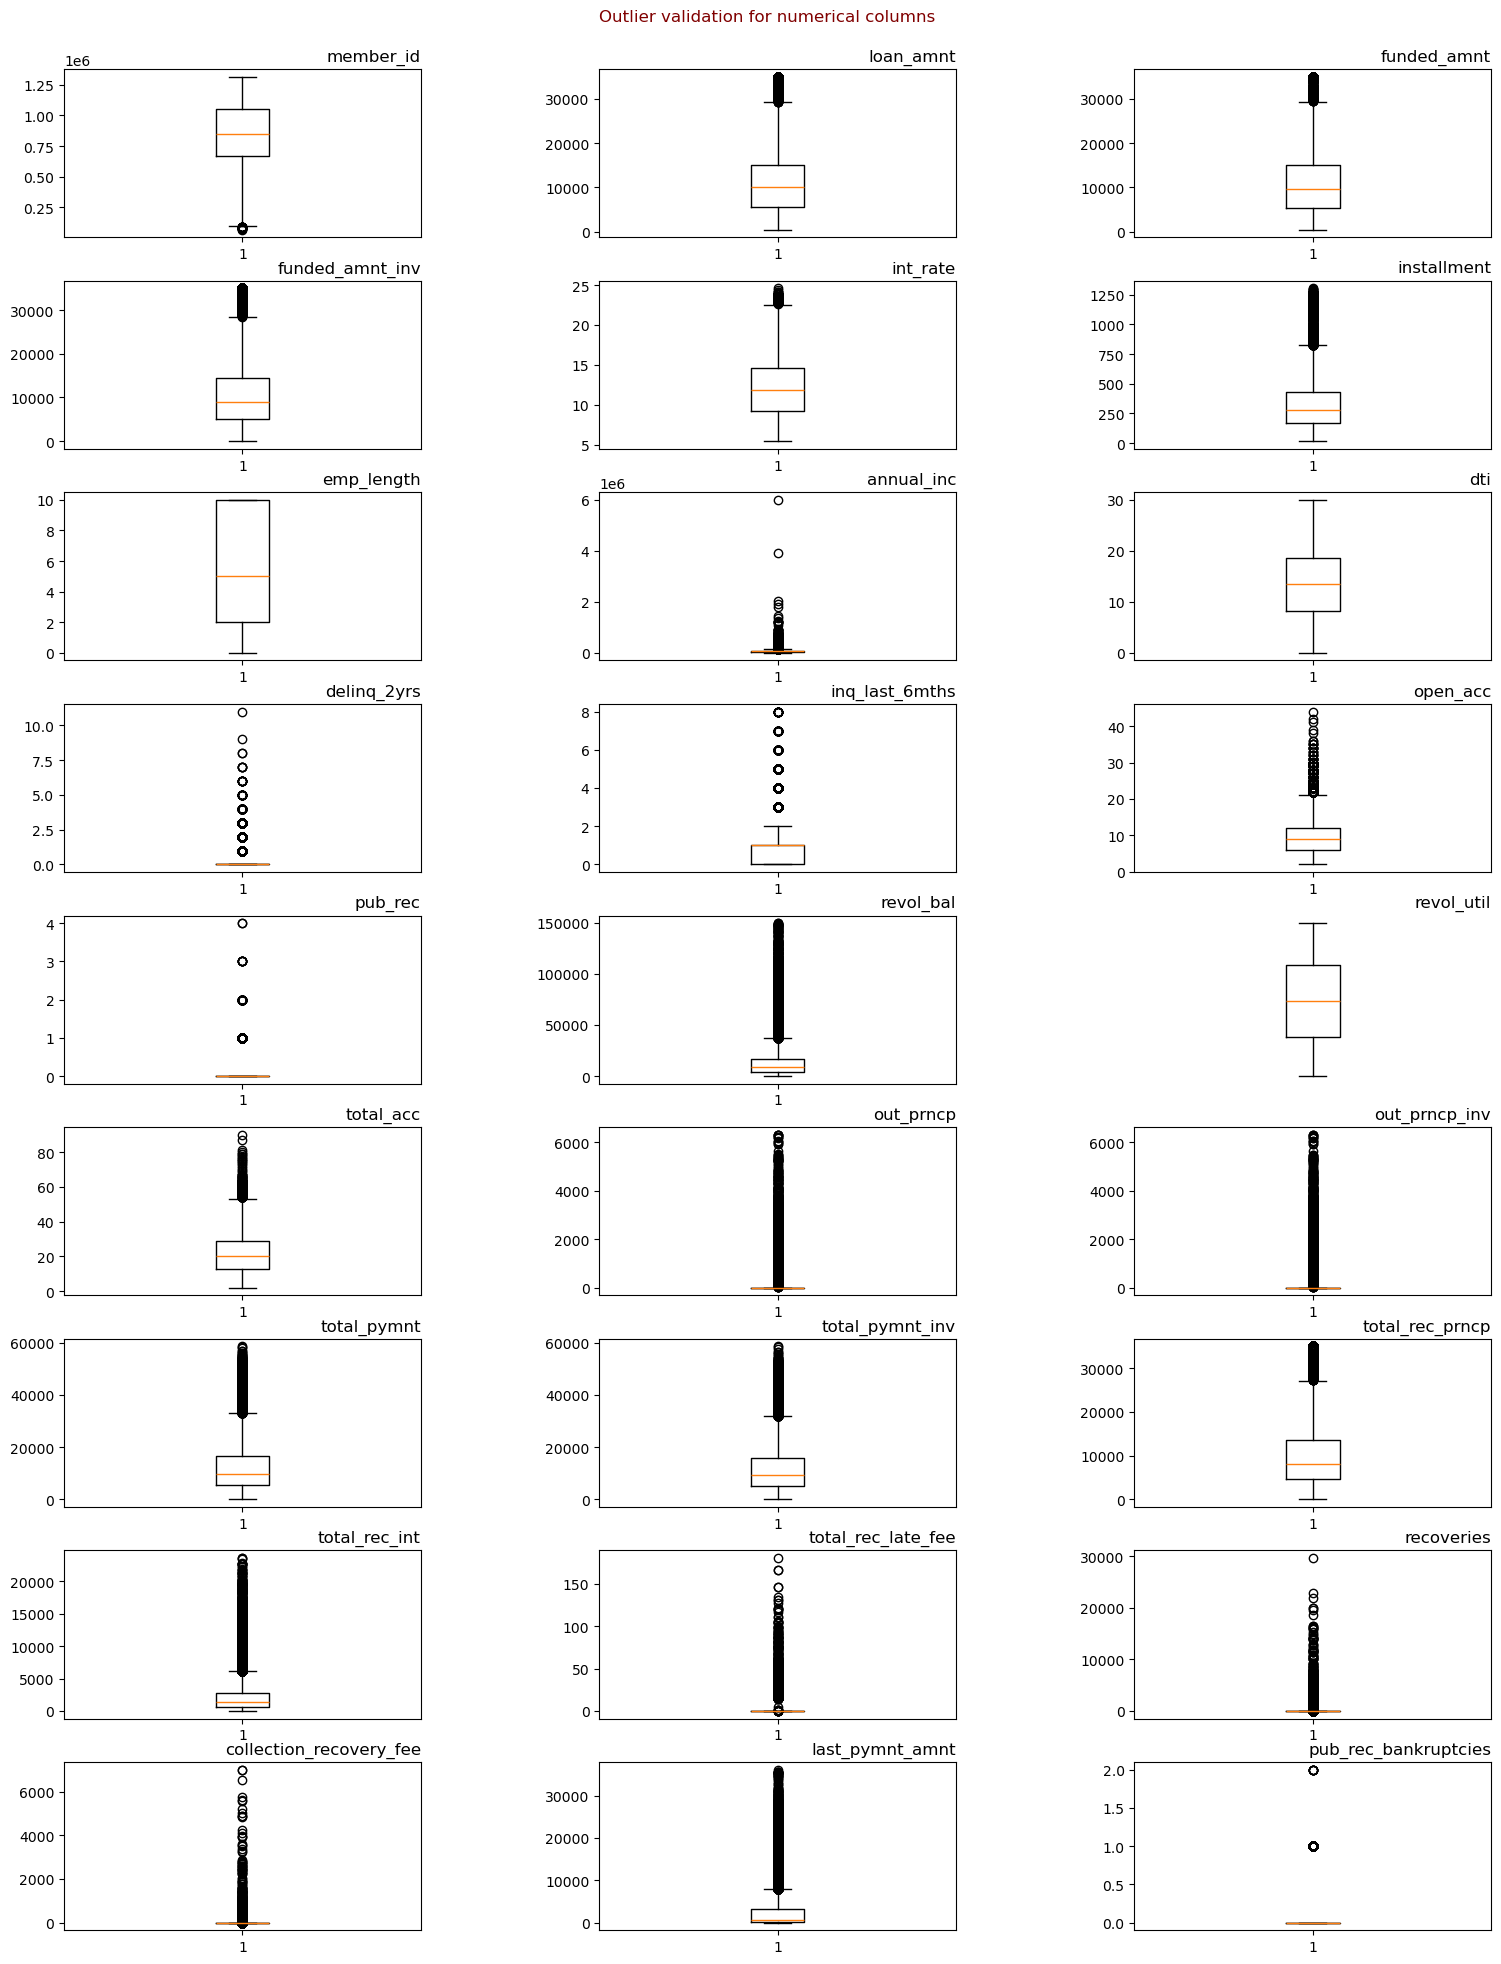

In [45]:
#Plot all numerical columns to identify any outliers
fig, axes = plt.subplots(9, 3, figsize=(15, 20))

fig.suptitle('Outlier validation for numerical columns\n',color='maroon')
fig.tight_layout()
fig.subplots_adjust(wspace=.5,top=0.95)

for i,col_name in enumerate(numcols):
    ax = axes[i // 3, i % 3]
    ax.boxplot(df[col_name])
    ax.set_title(col_name, weight='light', fontsize=12,loc='right')
axes[4,2].set_axis_off()

In [46]:
#Outliers in other columns seem to be genuine as we see continuity in data
print('delinq_2yrs          : ', list(map(lambda x: x, df.delinq_2yrs.value_counts().sort_index().index)))
print('open_acc             : ', list(map(lambda x: x, df.open_acc.value_counts().sort_index().index)))
print('pub_rec              : ', list(map(lambda x: x, df.pub_rec.value_counts().sort_index().index)))
print('pub_rec_bankruptcies : ', list(map(lambda x: x, df.pub_rec_bankruptcies.value_counts().sort_index().index)))

delinq_2yrs          :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
open_acc             :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 41, 42, 44]
pub_rec              :  [0, 1, 2, 3, 4]
pub_rec_bankruptcies :  [0.0, 1.0, 2.0]


In [47]:
# There's one record where open accounts > total accounts which doesnt make logical sense, so we remove it.
df = df[df['open_acc'] <= df['total_acc']]

In [48]:
df.describe(include='all').T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
member_id,39716.0,NaN,NaN,NaN,NaT,NaT,850482.820677,265653.919759,70699.0,666786.0,850820.5,1047342.0,1314167.0
loan_amnt,39716.0,NaN,NaN,NaN,NaT,NaT,11219.675949,7456.621058,500.0,5500.0,10000.0,15000.0,35000.0
funded_amnt,39716.0,NaN,NaN,NaN,NaT,NaT,10947.938488,7187.18891,500.0,5400.0,9600.0,15000.0,35000.0
funded_amnt_inv,39716.0,NaN,NaN,NaN,NaT,NaT,10397.671006,7128.402714,0.0,5000.0,8975.0,14400.0,35000.0
term,39716,2,36 months,29095,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,39716.0,NaN,NaN,NaN,NaT,NaT,12.0213,3.724791,5.42,9.25,11.86,14.59,24.59
installment,39716.0,NaN,NaN,NaN,NaT,NaT,324.568536,208.873344,15.69,167.0275,280.23,430.78,1305.19
grade,39716,7,B,12020,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,39716,35,B3,2917,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,37257,28616,US Army,136,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df.dtypes

member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                          int64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                         int64
earliest_cr_line           datetime64[ns]
inq_last_6mths                    

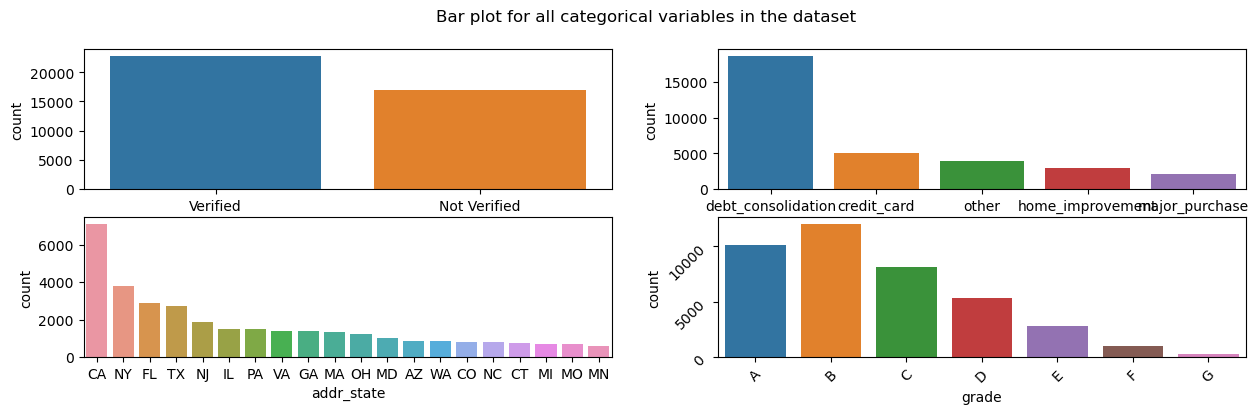

In [50]:
fig, axes = plt.subplots(2, 2, figsize = (15, 4))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'verification_status', data = df, order = df['verification_status'].value_counts().index);

sns.countplot(ax = axes[0, 1], x = 'purpose', data = df, order = df['purpose'].value_counts().index[:5]);

sns.countplot(ax = axes[1, 0], x = 'addr_state', data = df, order = df['addr_state'].value_counts().index[:20]);

sns.countplot(ax=axes[1, 1], x='grade', data=df,  order=df['grade'].value_counts().index.sort_values())

axes[1][1].tick_params(labelrotation=45);

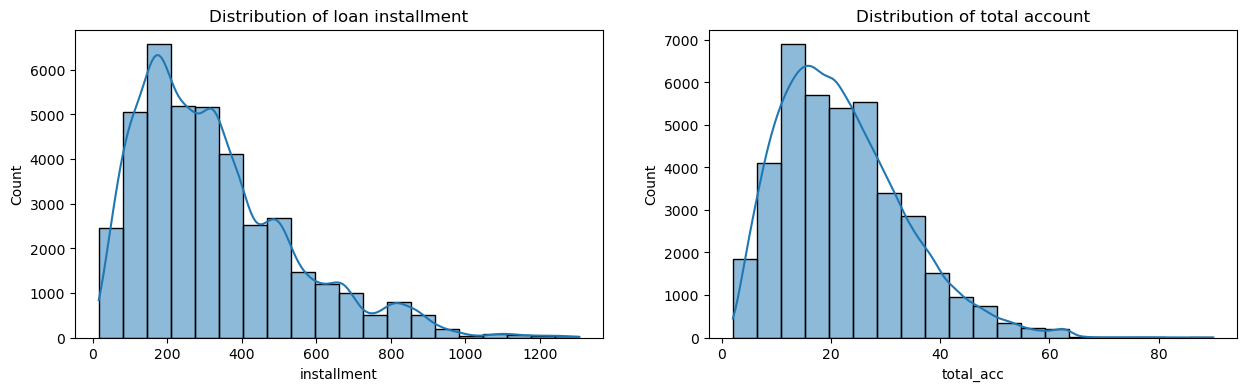

In [51]:
plt.figure(figsize=(15, 4))

# Distribution of installment
plt.subplot(1, 2, 1)
sns.histplot(df['installment'], kde=True, bins=20)
plt.title('Distribution of loan installment')

# Distribution of total_acc
plt.subplot(1, 2, 2)
sns.histplot(df['total_acc'], kde=True, bins=20)
plt.title('Distribution of total account')

plt.show()

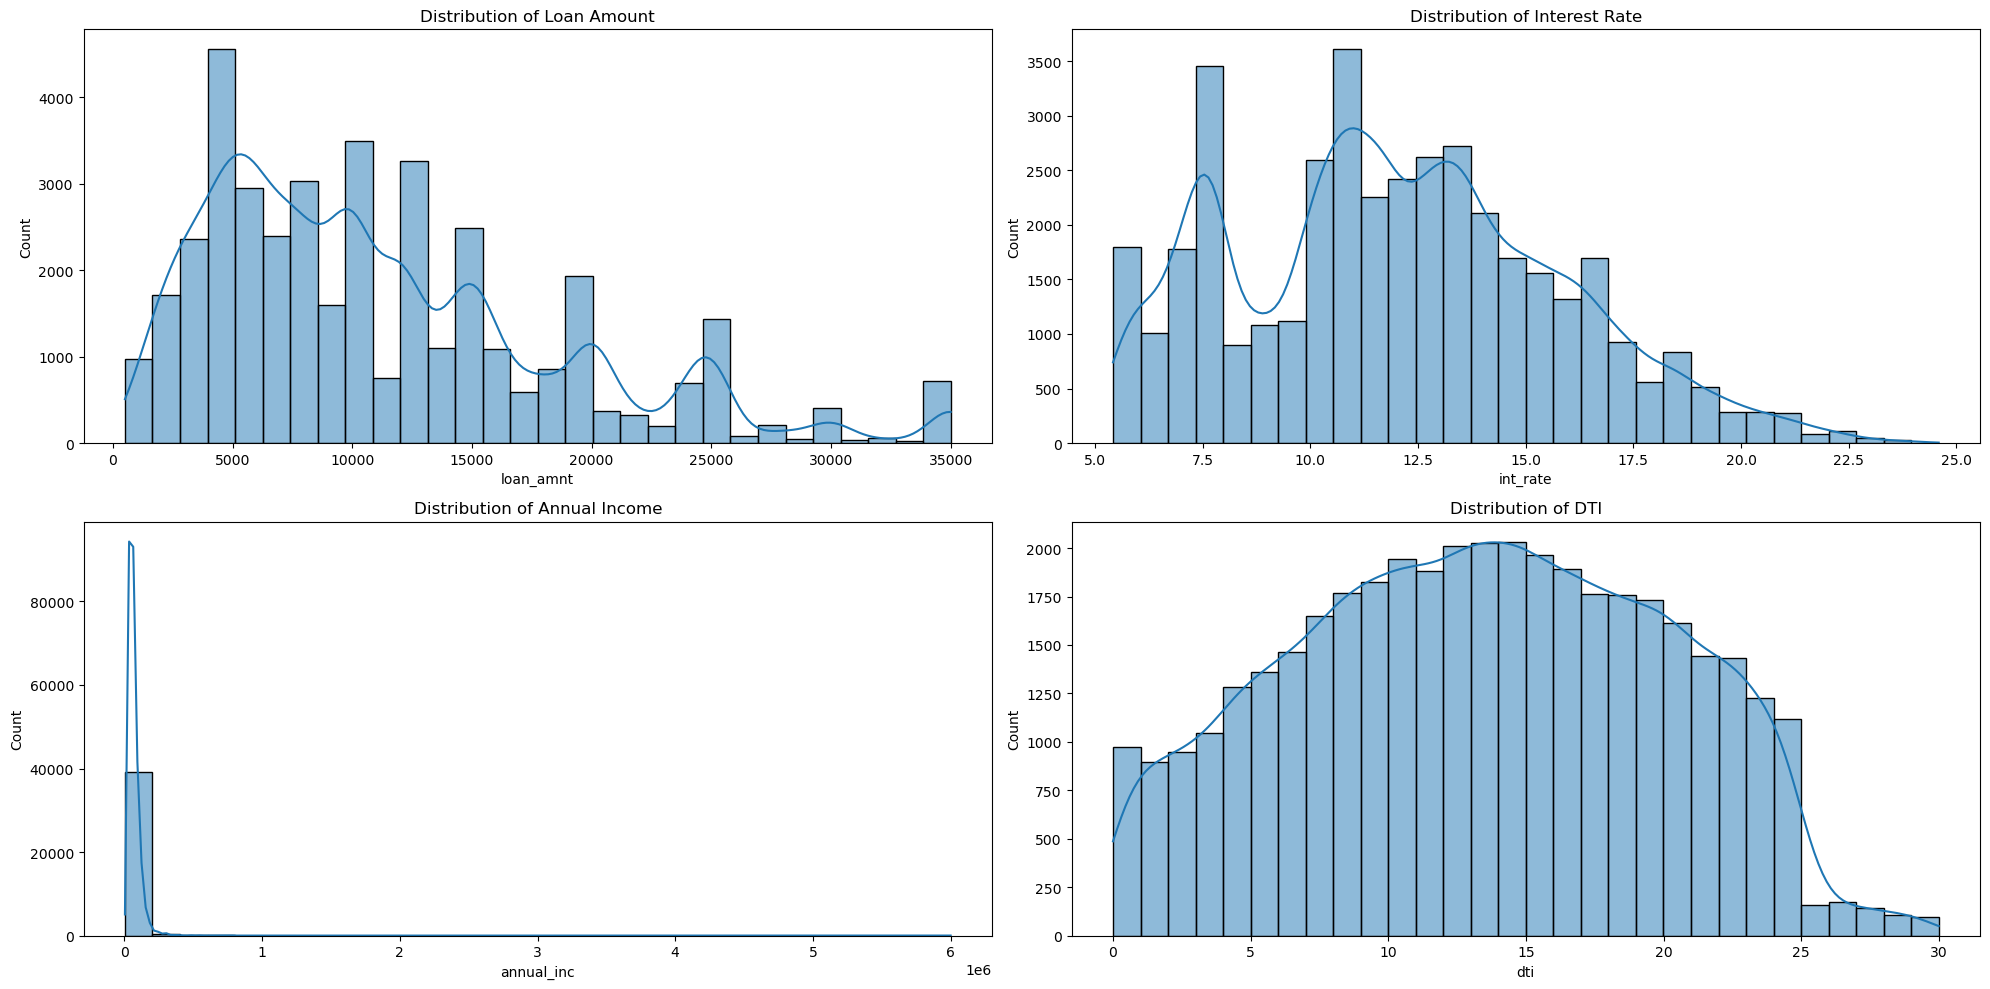

In [52]:
#Distribution plot for key numerical data columns
plt.figure(figsize=(20, 10))

# Loan Amount
plt.subplot(221)
sns.histplot(data=df,x='loan_amnt', bins=30, kde=True)
plt.title('Distribution of Loan Amount')

# Interest Rate
plt.subplot(222)
sns.histplot(data=df,x='int_rate', bins=30, kde=True)
plt.title('Distribution of Interest Rate')

# Annual Income
plt.subplot(223)
sns.histplot(data=df,x='annual_inc', bins=30, kde=True)
plt.title('Distribution of Annual Income')

# Debt-to-Income Ratio
plt.subplot(224)
sns.histplot(data=df,x='dti', bins=30, kde=True)
plt.title('Distribution of DTI')

plt.tight_layout()
plt.show()

### Some insights we get from the statistical summary are;

#### The average interest rate on loans is **12.02%**, with a minimum of **5.42%** and a maximum of **24.59%**.
#### The average annual income(annual_inc) of borrowers is **68,967**, with a minimum of **4,000** and a maximum of **60,00,000**.
#### The average debt-to-income ratio (DTI) of borrowers is **13.3**, with a minimum of 0 and a maximum of **29.99**.
#### Most loans are for a term of 36 months, with a total count of **39716** loans and **24,000** of them being source verified.
#### State CA (California) has the highest loan with **~7000** loans.

---------------------------------------------------------------------------------------------------------------------------------------------

### 6. Bivariate Analysis
* Finding the relationship between two variable whether there exists an association and the strength of this association

In [56]:
# Create pair plot, Due to unreadability selected few columns 
#sns.pairplot(df[numcols])
#plt.show()

In [57]:
# Extract the year from the issue_d column and create a new column loan_year
df['loan_year']=df['issue_d'].dt.year

# Extract the month from the issue_d column and create a new column loan_month
df['loan_month']=df['issue_d'].dt.month

# Derive Credit Line Age in years
df['credit_line_age'] = df['loan_year'] - df['earliest_cr_line'].dt.year

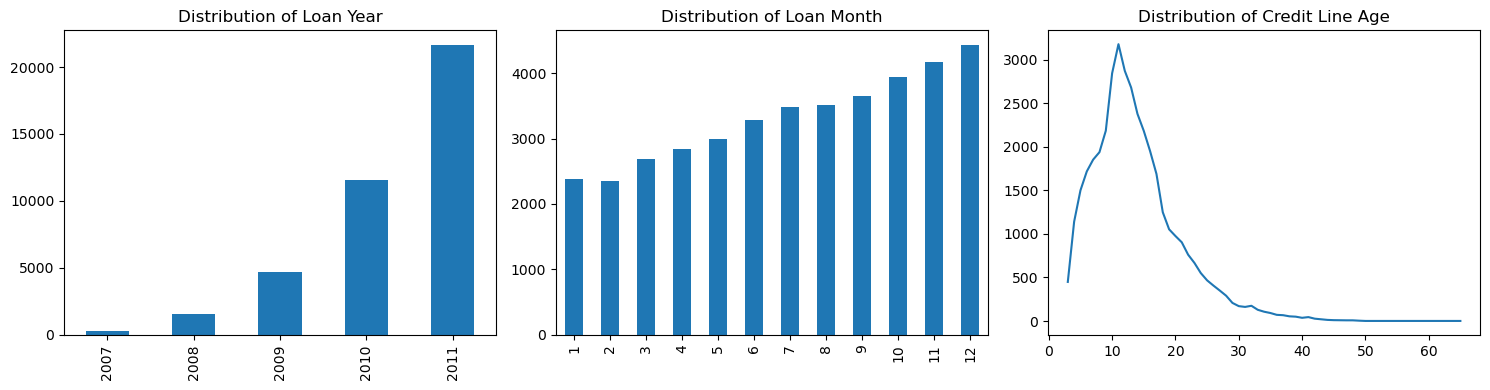

In [58]:
#Plotting derived metrics
plt.figure(figsize=(15, 4))

# Loan Year
plt.subplot(131)
df['loan_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Loan Year')

# Loan Year
plt.subplot(132)
df['loan_month'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Loan Month')

# Loan Year
plt.subplot(133)
df['credit_line_age'].value_counts().sort_index().plot(kind='line')
plt.title('Distribution of Credit Line Age')

#plt.savefig('Derived_01.jpeg')
plt.tight_layout()
plt.show()

### Insights:

***Loan Year:*** The bar chart shows a significant increase in the number of loans issued from 2007 to 2011, with 2011 having the highest number of loans by far. This trend indicates rapid growth in loan issuance over these years, possibly reflecting an expansion in market reach or changes in lending policies that made more capital available or more borrowers eligible.

***Loan Month:*** The distribution of loans shows a clear seasonal pattern throughout the year. Loan numbers are lowest in January and February, then gradually increase with the highest number of loans occurring in December (month 12). This year-end surge could be attributed to holiday-related borrowing or end-of-year financial decisions. The range spans from about 2,400 loans in January to over 4,000 in December, indicating significant monthly variation that Lending Club should consider in their operational planning and risk assessment strategies.

***Credit Line Age:*** The distribution of credit line age displays a pronounced right-skewed pattern with a peak occurring sharply between 10 and 15 years. This peak suggests that the most common credit history length for borrowers is within this range, indicating a typical duration after which many may settle their debts or choose to refinance. The rapid increase from 0 to 10 years highlights that many borrowers are relatively new to credit, with a gradual decline observed post-peak. This decline into a long tail extending up to about 60 years reflects a smaller group of borrowers with very established credit histories.

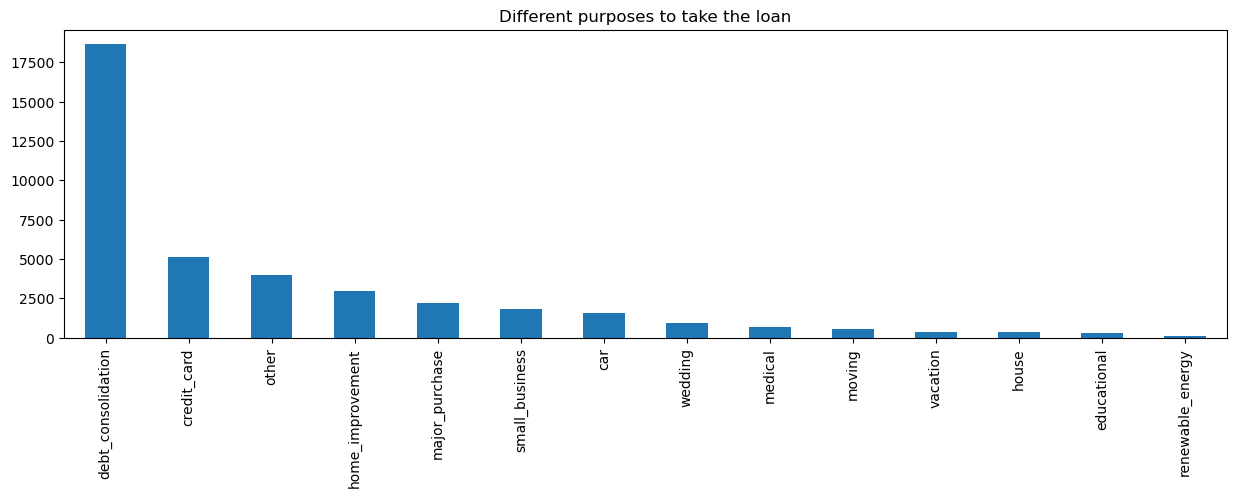

In [60]:
plt.figure(figsize=(15, 4))

purpose = df['purpose'].value_counts()

# Plotting number of purpose by frequency
purpose.plot(kind='bar')
plt.title('Different purposes to take the loan')

plt.show()

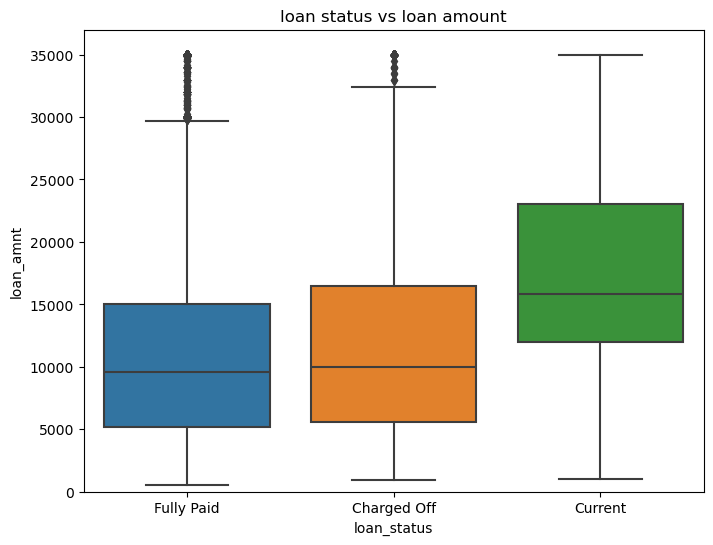

In [61]:
# boxplot loan_amnt/loan_status
var = 'loan_status'
data = pd.concat([df['loan_amnt'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="loan_amnt", data=df )
fig.axis(ymin=0, ymax=37000)
plt.title('loan status vs loan amount');

# inference : Bigger the loan amount , higher is the chance of charged off

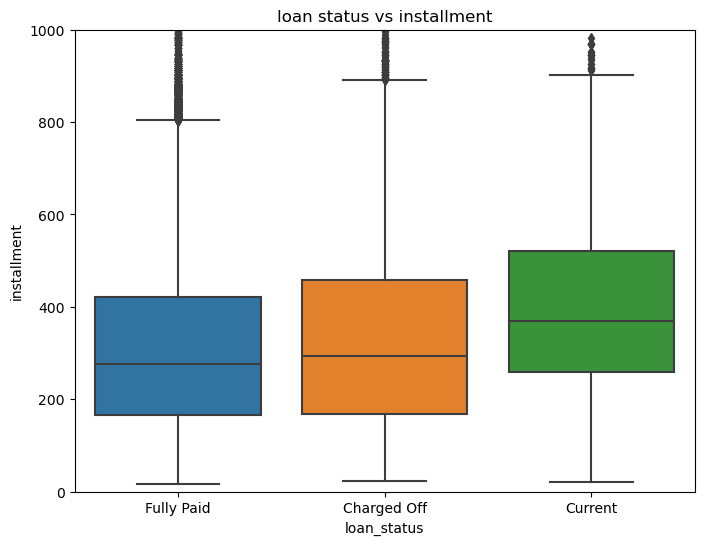

In [62]:
# boxplot installment/loan_status
var = 'loan_status'
data = pd.concat([df['installment'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="installment", data=df )
fig.axis(ymin=0, ymax=1000)
plt.title('loan status vs installment');

# higher installment amount increases the risk of charged off , but since most of the charged off loans have higher amount on average , it is an 
#         eventuality even if we consider constant interest rate , higher term duration of the loan can be explored to reduce charged off status 

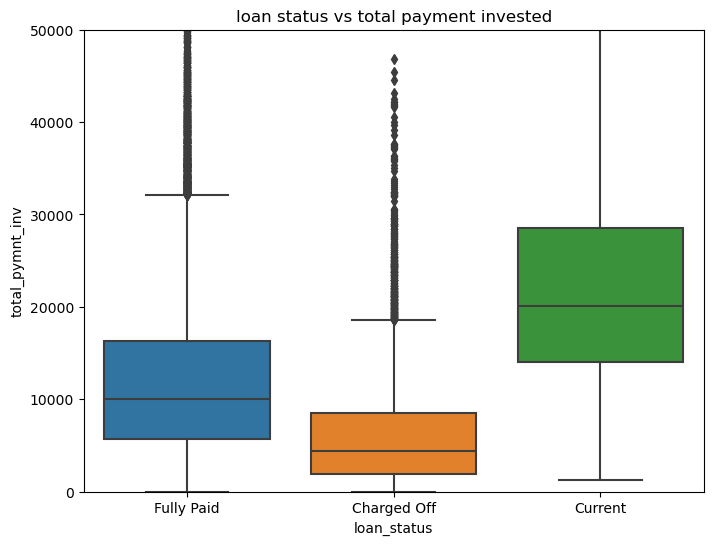

In [63]:
# boxplot total_pymnt_inv/loan_status
var = 'loan_status'
data = pd.concat([df['total_pymnt_inv'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="total_pymnt_inv", data=df )
fig.axis(ymin=0, ymax=50000)
plt.title('loan status vs total payment invested');

# inference : total_pymnt_inv is strongly related to loan_status

In [64]:
df.groupby(['loan_status' , 'home_ownership'])['installment'].agg(['count']).reset_index()

,loan_status,home_ownership,count
0,Charged Off,MORTGAGE,2327
1,Charged Off,OTHER,18
2,Charged Off,OWN,443
3,Charged Off,RENT,2839
4,Current,MORTGAGE,638
5,Current,OWN,83
6,Current,RENT,419
7,Fully Paid,MORTGAGE,14693
8,Fully Paid,NONE,3
9,Fully Paid,OTHER,80


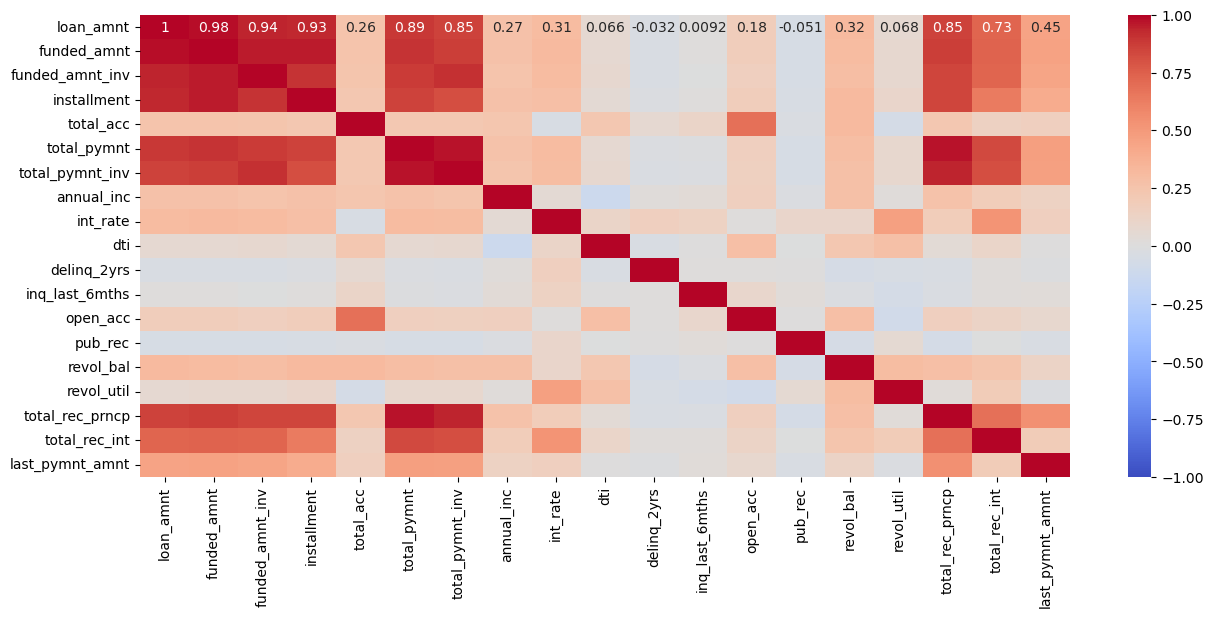

In [65]:
# Pearson correlation matrix to analyze relationship amony major numerical variable

f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df[['loan_amnt' , 'funded_amnt' , 'funded_amnt_inv' , 'installment' , 'total_acc' , 'total_pymnt' , 'total_pymnt_inv' , 
                  'annual_inc' , 'int_rate' ,'dti' , 'delinq_2yrs' , 'inq_last_6mths' , 'open_acc' , 'pub_rec' , 'revol_bal' , 'revol_util', 
                  'total_rec_prncp' , 'total_rec_int' , 'last_pymnt_amnt']]
                  .corr() , annot=True , vmin=-1 , vmax=1 , cmap='coolwarm');

# dropped delinq_2yrs , inq_last_6mths , pub_rec , dti columns and analyzed again as they are not stronly correlated with any any variable

### Insights from the correlation matrix

1. Loan amount(loan_amnt) has  very strong positive correlation with funded_amnt, funded_amnt_inv which is an Indication that the profit in the operations to meet its commitments.

2. Loan amount(loan_amnt) has very strong positive correlation with installment which  is obvious since higher loan_amnt will lead to higher installment controlled for term.

3. Loan amount(loan_amnt) has strong positive correlation with total_pymnt, total_pymnt_inv which is a strong indicator that the CFC is operationally efficient and prioritizes investors.

4. Loan amount(loan_amnt) has weak correlation with annual_inc which needs to be considered while giving loan.

5. Loan amount(loan_amnt) has very strong positive correlation with total_rec_prncp , total_rec_int , last_pymnt_amnt which is a great indicator that the CFC is great at collection management reducing structural risk.

6. Total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int has strong positive correlation as they are leading and lagging indicator of efficient collection system.

7. Int_rate has strong positive correlation with revol_util which may be an indicator that the CFC is catering to a segment which is loan starved from other sources or their interest rate is still substantially higher.

8. total_acc has strong positive correlation with open_acc which is an indicator that most of the credit files are open, which is an indicator of strong loan book.

9. Int_rate has strong positive correlation with total_rec_int which is an obvious conclusion since higher interest rate leads to higher interest recovery considering its not a bad loan.


### Summary of Correlation matrix 
* Loan amount is correlated highly with Annual Income, moderately with total accounts
* Interest rate in correlated highly with Revolving Utilization.
* Interest rate is moderately with loan amount and slightly with delinquency count in 2 years, Inquires in 6 months and DTI (Debit to Income)
* Public derogatory records highly correlated with public records
* Installment is highly correlated to Loan amount
* Annual Income is correlated with employment length

### Conclusions

* Loan Purpose: Debt consolidation and credit card payoff are the most common purposes, indicating a prevalent use of these loans for managing existing debt.
  
* Seasonal Trends: There is a clear seasonal pattern in loan issuance, peaking in December, which may reflect borrowers financial planning trends at year-end.
  
* Income Verification and Default Rates: The status of income verification does not consistently correlate with lower default rates, suggesting that it should not be overly relied upon, especially for larger loans.

* Account Number Risks: The number of open accounts presents a U-shaped risk profile, where very low and very high counts are associated with increased default risks, highlighting the complexity of financial management among borrowers with extreme numbers of credit lines.


**Loans with below criteria are highly contributing to charged off:**
* Loans with higher interest rate (>12%)
* Loans with grade 'F' and loan amount > 20K
* Higher amount loans (>13K) for small business, debt consolidation or credit card
* Borrower Debit to income ratio > 25% and loan amount > 15K
* Borrower annual income <50K and loan amount > 5K


### Recommendations

1. **Implement Risk-Based Pricing:** Develop a nuanced interest rate model that reflects diverse risk factors including DTI, credit utilization, and loan purpose, ensuring rates are commensurate with potential risks.
2. **Geographic Risk Management:** Establish tailored lending criteria for different regions, especially in states with historically higher default rates, to mitigate location-based risks.
3. **Specialized Debt Consolidation Programs:** Offer tailored financial products for debt consolidation with accompanying advisory services to help borrowers manage their debts more effectively.
4. **Enhance Employment Length Evaluation:** Balance the emphasis on employment length with comprehensive assessments of financial health to avoid over-prioritizing tenure over actual ability to repay.
5. **Credit Utilization Strategy:** Tighten approval criteria for borrowers with high credit utilization rates (>60%), recognizing this as a significant predictor of potential default.
6. **Seasonal Lending Adjustments:** Plan for seasonal fluctuations in loan demand, optimizing capital allocation and marketing strategies to match the observed end-of-year surge in borrowing.
7. **Stricter DTI Thresholds:** Enforce more rigorous reviews for loans where the DTI exceeds 20-25%, identifying this range as a critical risk threshold.
8. **Robust Income Verification:** Strengthen the income verification process, especially for larger loan amounts, to ensure that reported incomes are accurate and reliable.
9. **Adjust Loan Terms Based on Amount:** Tailor the terms of loans, particularly the maximum amount and duration, to better manage the risk profile of longer-term, larger loans.

### Acknowledgements


Thanks to the instructors from UpGrad and IIITB for guidance and feedback.


**Group member**

Suhas Naik K

8722476171